# **Pêndulo**

Aplicação e comparação entre o modelo de Euler e a aplicação analítica: 

In [0]:
import math
import matplotlib.pyplot as pyplot

In [0]:
def nextOeuler(O,t,params,dt):
  w=math.sqrt((params[1]/params[0]))
  return(O+w*dt)

In [0]:
def nextOanalítico(t,params):
  return math.sqrt((params[1]/params[0]))*t+params[2]


Erro do x =  0.0009810435818560642
Erro do y =  -0.00019376572760286537
Erro do x =  0.0009829321550676416
Erro do y =  -0.00018394576708512245
Erro do x =  0.0009847224358828198
Erro do y =  -0.0001741074121439229
Erro do x =  0.00098641424527501
Erro do y =  -0.00016425164660661962
Erro do x =  0.0009880074140646792
Erro do y =  -0.00015437945604153402
Erro do x =  0.0009895017829362803
Erro do y =  -0.0001444918276594931
Erro do x =  0.000990897202454169
Erro do y =  -0.0001345897502150889
Erro do x =  0.000992193533077555
Erro do y =  -0.0001246742139078133
Erro do x =  0.0009933906451744592
Erro do y =  -0.00011474621028306764
Erro do x =  0.0009944884190346698
Erro do y =  -0.00010480673213289493
Erro do x =  0.0009954867448817139
Erro do y =  -9.485677339685084e-05
Erro do x =  0.0009963855228838359
Erro do y =  -8.48973290625138e-05
Erro do x =  0.0009971846631639933
Erro do y =  -7.492939506600904e-05
Erro do x =  0.0009978840858088141
Erro do y =  -6.495396819246324e-05
Erro 

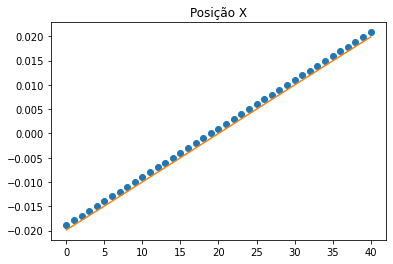

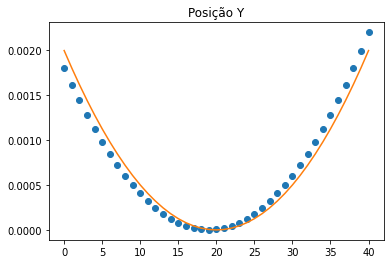

In [13]:
dt=0.001  #variação do tempo
t=0
O=-0.2
maxi=-O
params=[0.1,10,O] #condições de contorno: params[0] é o comprimento da corda; params[1] é a gravidade; params[2] ângulo inicial.

oa=O

Oa=[]
Xa=[]
Ya=[]

Oe=[]
Xe=[]
Ye=[]

cont=0;
while(O<maxi or oa<maxi):
  Oa.append(nextOanalítico(t,params))
  oa=nextOanalítico(t,params)
  Xa.append(params[0]*(math.sin(nextOanalítico(t,params))))
  Ya.append(params[0]-(params[0]*math.cos(nextOanalítico(t,params))))

  Oe.append(nextOeuler(O,t,params,dt))
  Xe.append(params[0]*math.sin(nextOeuler(O,t,params,dt)))
  Ye.append(params[0]-(params[0]*math.cos(nextOeuler(O,t,params,dt))))

  print("Erro do x = ", Xe[cont]-Xa[cont])
  print("Erro do y = ", Ye[cont]-Ya[cont])
  t+=dt
  cont+=1
  O=nextOeuler(O,t,params,dt)

pyplot.figure(0)
pyplot.plot(Xe,label='Euler',linestyle='',marker='o')
pyplot.plot(Xa,label='Analítico')
pyplot.title('Posição X')
pyplot.show(block=False)

pyplot.figure(0)
pyplot.plot(Ye,label='Euler',linestyle='',marker='o')
pyplot.plot(Ya,label='Analítico')
pyplot.title('Posição Y')
pyplot.show(block=False)





**Animação**

In [0]:
import matplotlib.pyplot as plt
from matplotlib import collections as mc
import os
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML
import random
import requests
import os
from io import BytesIO


In [0]:
def simulaTrajeto(x,y, titleStr):


    plotSizeK=5
    plt.close()
    figSimula, axSimula = plt.subplots(1, 1, figsize = (plotSizeK, plotSizeK))

    axSimula.plot(x,y, 'r-*')
    plt.title(titleStr)


    plt.show()

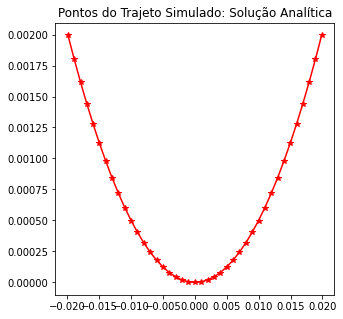

In [16]:
simulaTrajeto(Xa,Ya,'Pontos do Trajeto Simulado: Solução Analítica')

In [0]:
# initialization function: plot the background of each frame
def initAnimate():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animate(i):
    ind0 = i%len(xAnim)
    ind1 = (i+1)%len(xAnim)
    ind1 = ind0
    #ax.plot(xs,ys,'r*')
    line.set_data([xAnim[ind0], xAnim[ind1]] , [yAnim[ind0], yAnim[ind1]])
    return (line,)

def createAnimPlot(titleStr):
    plotSizeK=5

    figAnim, axAnim = plt.subplots(1, 1, figsize = (plotSizeK, plotSizeK))

    plt.title(titleStr)
    
    line, = axAnim.plot(Xa, Ya, 'r-*', lw=5)
    nFrames=len(xAnim)-1
    
    return(figAnim, axAnim, nFrames, line)

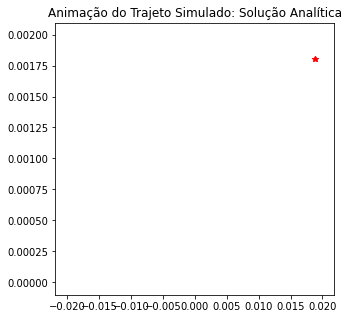

In [19]:
# Animacao: Solucao analitica

xAnim = Xa
yAnim = Ya

figAnim, axAnim, nFrames, line, = createAnimPlot('Animação do Trajeto Simulado: Solução Analítica')

anim = animation.FuncAnimation(figAnim, animate, init_func=initAnimate,
                             frames=nFrames, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')

anim
#plt.close()
